In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

In [136]:
# To read cleaned dataset
data = pd.read_csv('Patients Data For Analysis.csv',low_memory=False)

In [138]:
data.isnull().sum()

Patient_Number          0
Date Announced          0
Age Bracket             0
Gender                  0
Detected District       0
Detected State          0
Current Status          0
Type of transmission    0
dtype: int64

In [140]:
data.head()

,Patient_Number,Date Announced,Age Bracket,Gender,Detected District,Detected State,Current Status,Type of transmission
0,1,30-01-2020,20.0,F,Thrissur,Kerala,Recovered,Imported
1,2,02-02-2020,38.0,F,Alappuzha,Kerala,Recovered,Imported
2,3,03-02-2020,38.0,F,Kasaragod,Kerala,Recovered,Imported
3,4,02-03-2020,45.0,M,East Delhi,Delhi,Recovered,Imported
4,5,02-03-2020,24.0,M,Hyderabad,Telangana,Recovered,Imported


In [142]:
# To replace the wrong entries for gender
data['Gender'] = data['Gender'].replace(to_replace="M ", value="M")
data['Gender'] = data['Gender'].replace(to_replace="M,", value="M")

In [144]:
#To rename the columns
data.rename(columns = {'Current Status':'CurrentStatus'}, inplace = True)
data.rename(columns = {'Age Bracket':'Age'}, inplace = True)
data.rename(columns = {'Detected District':'DetectedDistrict'}, inplace = True)

/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_59702/1148516785.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Detected State', order=state_order, palette="Blues_d")


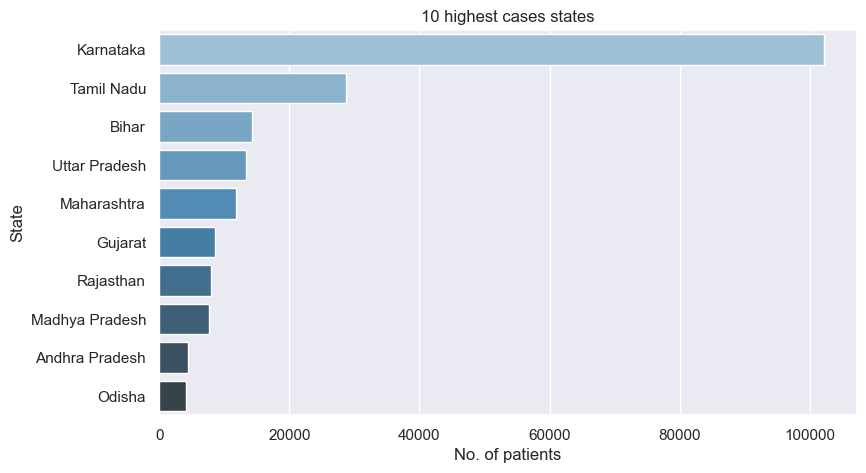

In [146]:
# Top 10 states with highest number of cases
state_order = data['Detected State'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='Detected State', order=state_order, palette="Blues_d")
sns.set_color_codes("muted")
plt.title('10 highest cases states')
plt.xlabel('No. of patients')
plt.ylabel('State');

/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_59702/1433568378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='DetectedDistrict', order=dist_order, palette="Greens_d")


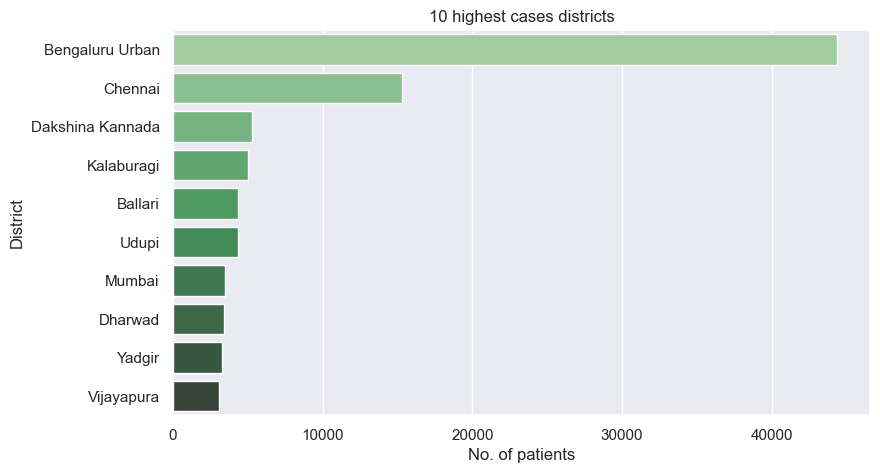

In [148]:
# Top 10 Districts with highest number of cases
dist_order = data['DetectedDistrict'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=data, y='DetectedDistrict', order=dist_order, palette="Greens_d")
sns.set_color_codes("muted")
plt.title('10 highest cases districts')
plt.xlabel('No. of patients')
plt.ylabel('District');

In [ ]:
# Multivariate Analysis

/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_59702/916048403.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)


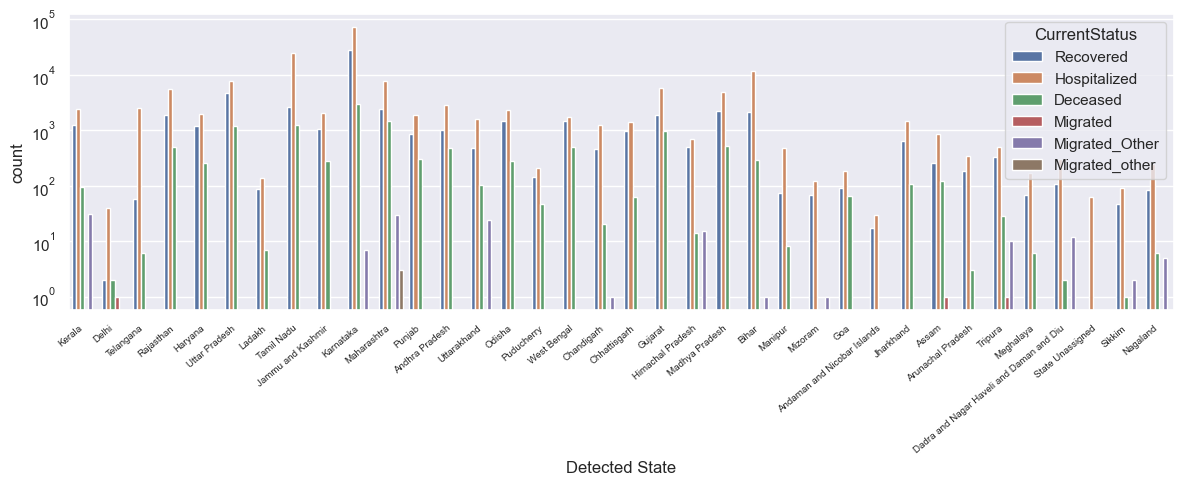

In [150]:
fig, ax = plt.subplots(1, figsize = (12,5))
ax = sns.countplot(x="Detected State", hue="CurrentStatus",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
ax.set_yscale("log")
plt.tight_layout()
plt.show()

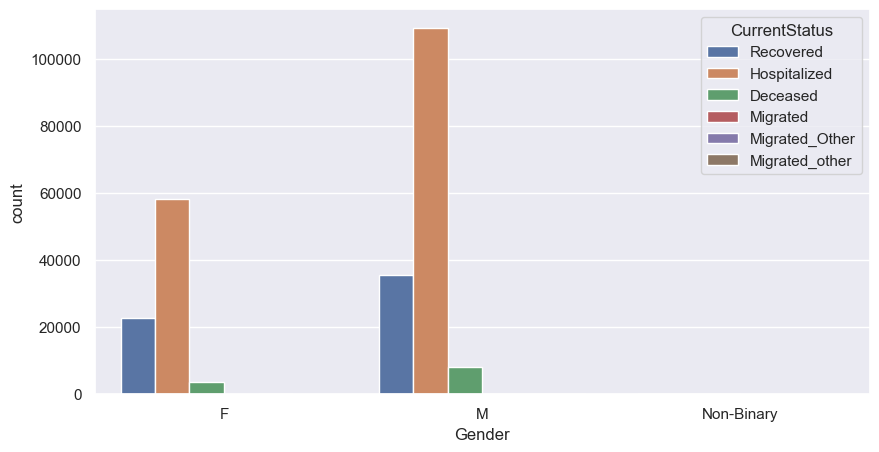

In [53]:
sns.countplot(x="Gender", hue="CurrentStatus", data=data)
sns.set(rc={'figure.figsize':(10,5)})

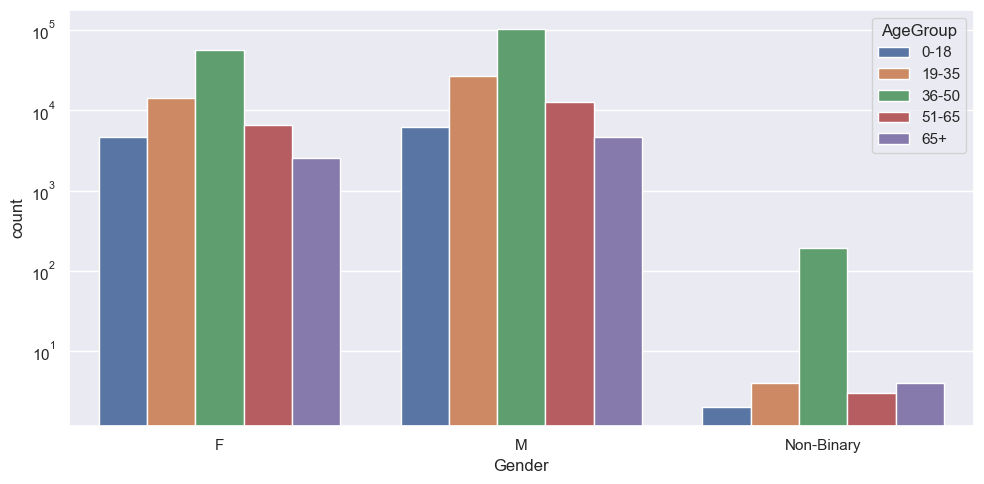

In [97]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

ax = sns.countplot(x="Gender", hue="AgeGroup",data=data)

ax.set_yscale("log")
plt.tight_layout()
plt.show()

/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_59702/2984482090.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)


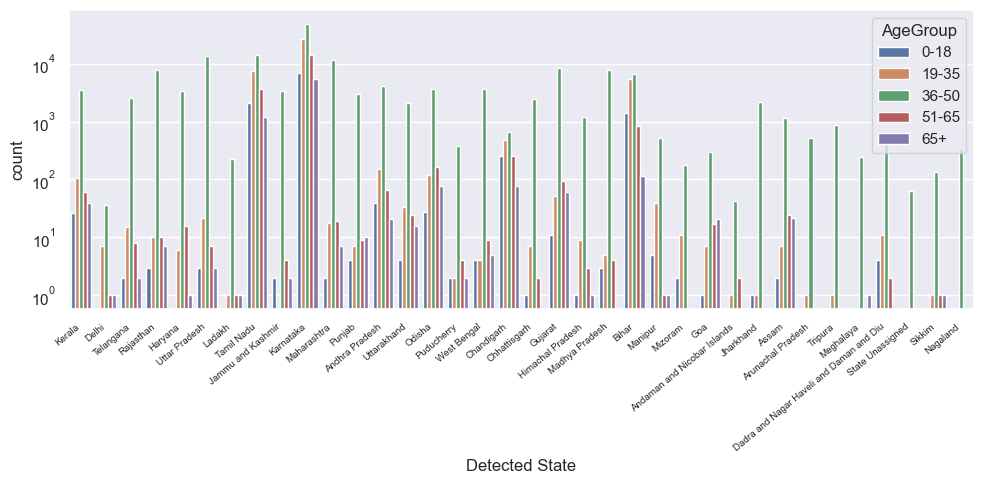

In [103]:
ax = sns.countplot(x="Detected State", hue="AgeGroup",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
ax.set_yscale("log")
plt.tight_layout()
plt.show()

/var/folders/s7/dbcb9pbd689012hx3lw5jhb40000gn/T/ipykernel_59702/3144931428.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)


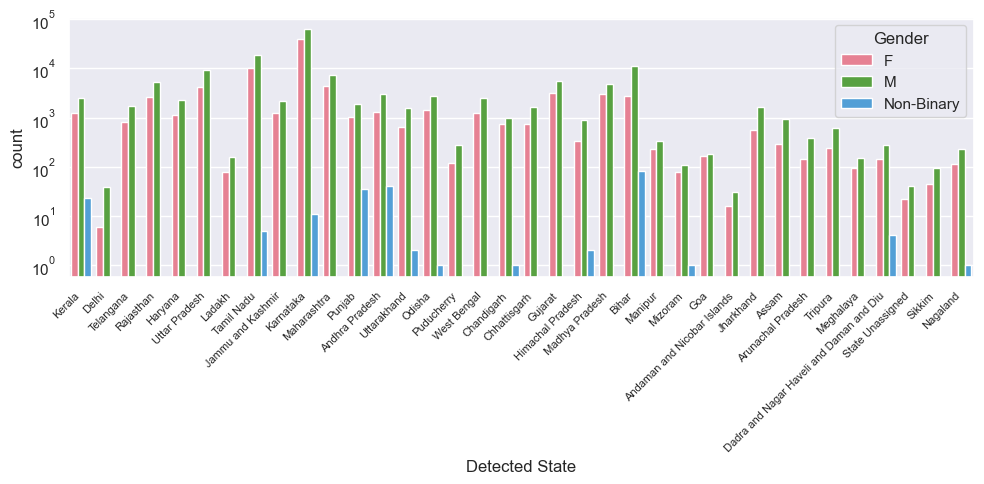

In [125]:
ax = sns.countplot(x="Detected State", hue="Gender",palette="husl",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yscale("log")
plt.tight_layout()
plt.show()